In [65]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt


fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5/yolov5/yolov5/yolov5


In [67]:
!pip install -q pycocotools

In [ ]:

base_path = "/content/drive/MyDrive"
train_dir = f"{base_path}/train"
valid_dir = f"{base_path}/valid"

train_json = f"{train_dir}/train_annotations.coco.json"
valid_json = f"{valid_dir}/valid_annotations.coco.json"

train_labels = f"{train_dir}/labels"
valid_labels = f"{valid_dir}/labels"

In [ ]:

import os
import json
from tqdm import tqdm

def convert_coco_to_yolo(json_file, label_folder):
    os.makedirs(label_folder, exist_ok=True)
    with open(json_file, 'r') as f:
        data = json.load(f)

    images = {img['id']: img for img in data['images']}
    for ann in tqdm(data['annotations'], desc=f"Converting {os.path.basename(json_file)}"):
        image = images[ann['image_id']]
        w, h = image['width'], image['height']
        bbox = ann['bbox']  

        x_center = (bbox[0] + bbox[2] / 2) / w
        y_center = (bbox[1] + bbox[3] / 2) / h
        bw = bbox[2] / w
        bh = bbox[3] / h

        label_path = os.path.join(label_folder, os.path.splitext(image['file_name'])[0] + '.txt')
        with open(label_path, 'a') as f:
            f.write(f"0 {x_center:.6f} {y_center:.6f} {bw:.6f} {bh:.6f}\n")
    print(f"✅ Labels saved to: {label_folder}")


In [ ]:

convert_coco_to_yolo(train_json, train_labels)
convert_coco_to_yolo(valid_json, valid_labels)


Converting train_annotations.coco.json: 100%|██████████| 5319/5319 [00:29<00:00, 180.90it/s]


✅ Labels saved to: /content/drive/MyDrive/train/labels


Converting valid_annotations.coco.json: 100%|██████████| 1235/1235 [00:06<00:00, 201.06it/s]

✅ Labels saved to: /content/drive/MyDrive/valid/labels


In [ ]:
import os
import shutil

base_path = "/content/drive/MyDrive"
label_subfolders = ["train/labels", "valid/labels"]
destination_folders = ["train", "valid"]

for label_sub, dest in zip(label_subfolders, destination_folders):
    label_path = os.path.join(base_path, label_sub)
    dest_path = os.path.join(base_path, dest)

    if os.path.exists(label_path):
        for file in os.listdir(label_path):
            if file.endswith(".txt"):
                shutil.move(os.path.join(label_path, file), os.path.join(dest_path, file))
        print(f"✅ Moved labels from {label_path} to {dest_path}")
    else:
        print(f"⚠️ Label folder not found: {label_path}")


✅ Moved labels from /content/drive/MyDrive/train/labels to /content/drive/MyDrive/train
✅ Moved labels from /content/drive/MyDrive/valid/labels to /content/drive/MyDrive/valid


In [96]:
!echo "Train Images:" && ls /content/drive/MyDrive/train/*.jpg | wc -l
!echo "Train Labels:" && ls /content/drive/MyDrive/train/*.txt | wc -l

!echo "Valid Images:" && ls /content/drive/MyDrive/valid/*.jpg | wc -l
!echo "Valid Labels:" && ls /content/drive/MyDrive/valid/*.txt | wc -l


Train Images:
1966
Train Labels:
1966
Valid Images:
485
Valid Labels:
485


In [ ]:
import os

base_path = "/content/drive/MyDrive"

yaml_path = os.path.join(base_path, "data.yaml")

yaml_content = """train: /content/drive/MyDrive/train
val: /content/drive/MyDrive/valid

nc: 1
names: ['pothole']
"""

with open(yaml_path, "w") as f:
    f.write(yaml_content)

print(f"✅ data.yaml created at: {yaml_path}")


✅ data.yaml created at: /content/drive/MyDrive/data.yaml


In [98]:
%cd yolov5


/content/yolov5/yolov5/yolov5/yolov5/yolov5


In [99]:
%cd /content
!rm -rf yolov5

/content


In [100]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17516, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 17516 (delta 8), reused 0 (delta 0), pack-reused 17494 (from 3)
Receiving objects: 100% (17516/17516), 16.62 MiB | 16.70 MiB/s, done.
Resolving deltas: 100% (12004/12004), done.
/content/yolov5


In [101]:
!pip install -r requirements.txt

!python train.py \
  --img 640 \
  --batch 16 \
  --epochs 30 \
  --data /content/drive/MyDrive/data.yaml \
  --weights yolov5s.pt \
  --name pothole_yolov5_model \
  --cache


Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
      10/29      4.44G    0.04373      0.018          0         62        640:  12% 15/123 [00:03<00:24,  4.45it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      10/29      4.44G     0.0436      0.018          0         58        640:  13% 16/123 [00:03<00:24,  4.36it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      10/29      4.44G    0.04379    0.01792          0         72        640:  14% 17/123 [00:03<00:24,  4.31it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp

Saving Alligator-to-pothole.jpg to Alligator-to-pothole.jpg


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 1024x768 1 pothole
Speed: 15.0ms pre-process, 8.1ms inference, 2.2ms NMS per image at shape (1, 3, 640, 480)


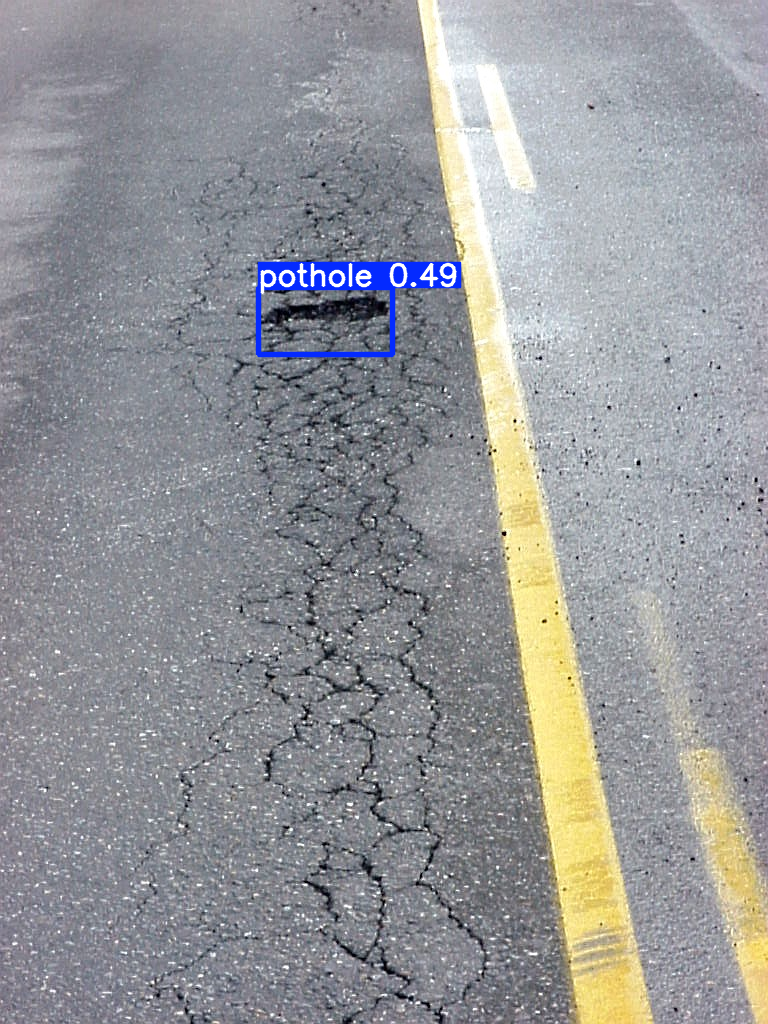

In [103]:
from google.colab import files
from PIL import Image
import torch

# Upload image
uploaded = files.upload()

# Load model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/yolov5/runs/train/pothole_yolov5_model/weights/best.pt')

# Detect
for fname in uploaded.keys():
    results = model(fname)
    results.print()     # Number of potholes etc.
    results.show()      # Show image with boxes


In [105]:
import shutil

# Source path of the best model
src = "/content/yolov5/runs/train/pothole_yolov5_model/weights/best.pt"

# Destination in your Google Drive
dst = "/content/drive/MyDrive/pothole_yolo_model/pothole_best.pt"

# Move the model
shutil.copy(src, dst)

print(f"✅ Model saved to: {dst}")


✅ Model saved to: /content/drive/MyDrive/pothole_yolo_model/pothole_best.pt
